In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import zscore

In [126]:
# Load the dataset
df = pd.read_csv("Software_Salaries.csv")  

In [127]:
# 1. Shape of the dataset
print("🔹 Dataset Shape (rows, columns):", df.shape)


🔹 Dataset Shape (rows, columns): (100000, 18)


In [128]:
#  Missing Value Summary

print("\n Missing values:\n")
print(df.isnull().sum())


 Missing values:

job_title                  0
experience_level       20000
employment_type        23984
company_size               0
company_location           0
remote_ratio               0
salary_currency            0
years_experience           0
base_salary                0
bonus                      0
stock_options              0
total_salary               0
salary_in_usd              0
currency                   0
education             100000
skills                100000
conversion_rate            0
adjusted_total_usd         0
dtype: int64


In [129]:
# Sample Data

print("\n Sample Data:\n")
print(df.head())


 Sample Data:

            job_title experience_level employment_type company_size  \
0        Data Analyst              Mid        Contract       Medium   
1     DevOps Engineer              Mid        Contract        Small   
2  Research Scientist             Lead             NaN       Medium   
3       Software Engr             Lead       Full-time        Large   
4       Software Engr             Lead          Intern        Large   

  company_location  remote_ratio salary_currency  years_experience  \
0          Germany             0             INR                13   
1            India           100             GBP                 9   
2          Germany             0             EUR                19   
3            India            50             INR                 7   
4          Germany           100             INR                10   

     base_salary  bonus  stock_options   total_salary  salary_in_usd currency  \
0   68407.451747   1100          19325   88832.451747  

In [130]:
# These two columns exist in the dataset, but all 100,000 rows have missing (NaN) values

df = df.drop(columns=["education", "skills"])


In [131]:
# 1. Shape of the dataset
print("🔹 Dataset Shape (rows, columns):", df.shape)


🔹 Dataset Shape (rows, columns): (100000, 16)


In [132]:
# 2. Dataset info
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   job_title           100000 non-null  object 
 1   experience_level    80000 non-null   object 
 2   employment_type     76016 non-null   object 
 3   company_size        100000 non-null  object 
 4   company_location    100000 non-null  object 
 5   remote_ratio        100000 non-null  int64  
 6   salary_currency     100000 non-null  object 
 7   years_experience    100000 non-null  int64  
 8   base_salary         100000 non-null  float64
 9   bonus               100000 non-null  int64  
 10  stock_options       100000 non-null  int64  
 11  total_salary        100000 non-null  float64
 12  salary_in_usd       100000 non-null  float64
 13  currency            100000 non-null  object 
 14  conversion_rate     100000 non-null  float64
 15  adjusted_total_usd

In [133]:
# 3. Summary statistics
print("\n🔹 Summary Statistics:")
print(df.describe(include='all'))


🔹 Summary Statistics:
           job_title experience_level employment_type company_size  \
count         100000            80000           76016       100000   
unique            12                4               4            3   
top     Data Analyst              Mid       Part-time        Small   
freq           16857            20079           19146        33538   
mean             NaN              NaN             NaN          NaN   
std              NaN              NaN             NaN          NaN   
min              NaN              NaN             NaN          NaN   
25%              NaN              NaN             NaN          NaN   
50%              NaN              NaN             NaN          NaN   
75%              NaN              NaN             NaN          NaN   
max              NaN              NaN             NaN          NaN   

       company_location   remote_ratio salary_currency  years_experience  \
count            100000  100000.000000          100000     1

In [134]:
# 4. Check for missing values
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())


🔹 Missing Values per Column:
job_title                 0
experience_level      20000
employment_type       23984
company_size              0
company_location          0
remote_ratio              0
salary_currency           0
years_experience          0
base_salary               0
bonus                     0
stock_options             0
total_salary              0
salary_in_usd             0
currency                  0
conversion_rate           0
adjusted_total_usd        0
dtype: int64


In [135]:
# 5. Number of unique values per column
print("\n🔹 Unique Values per Column:")
print(df.nunique())


🔹 Unique Values per Column:
job_title                12
experience_level          4
employment_type           4
company_size              3
company_location          6
remote_ratio              3
salary_currency           5
years_experience         21
base_salary           29893
bonus                  9494
stock_options         19093
total_salary          29976
salary_in_usd         29976
currency                  5
conversion_rate           5
adjusted_total_usd    81716
dtype: int64


In [136]:
# 6. Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n🔹 Duplicate Rows: {duplicate_count}")


🔹 Duplicate Rows: 10100


In [137]:
df.head()

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,base_salary,bonus,stock_options,total_salary,salary_in_usd,currency,conversion_rate,adjusted_total_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,68407.451747,1100,19325,88832.451747,1065.989421,USD,1.000,88832.451747
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,64193.117775,2194,19164,85551.117775,111216.453107,EUR,1.100,94106.229552
2,Research Scientist,Lead,NaN,Medium,Germany,0,EUR,19,136071.842899,3206,12735,152012.842899,167214.127189,EUR,1.100,167214.127189
3,Software Engr,Lead,Full-time,Large,India,50,INR,7,141850.905335,9594,11158,162602.905335,19512.348640,USD,1.000,162602.905335
4,Software Engr,Lead,Intern,Large,Germany,100,INR,10,121841.163226,6796,806,129443.163226,1553.317959,INR,0.012,1553.317959


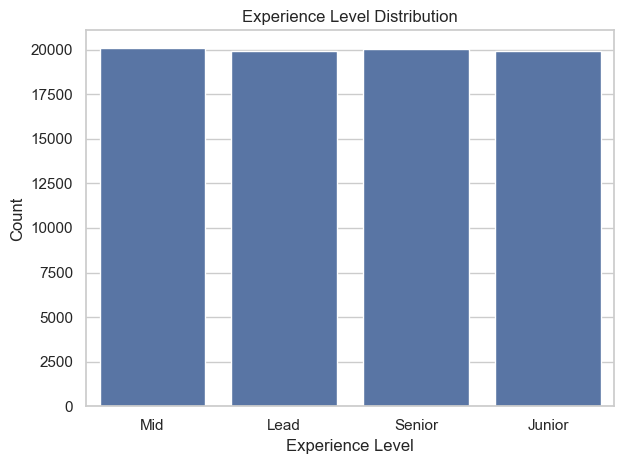

In [138]:
# 1. Count plot for experience level
sns.countplot(x='experience_level', data=df)
plt.title("Experience Level Distribution")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


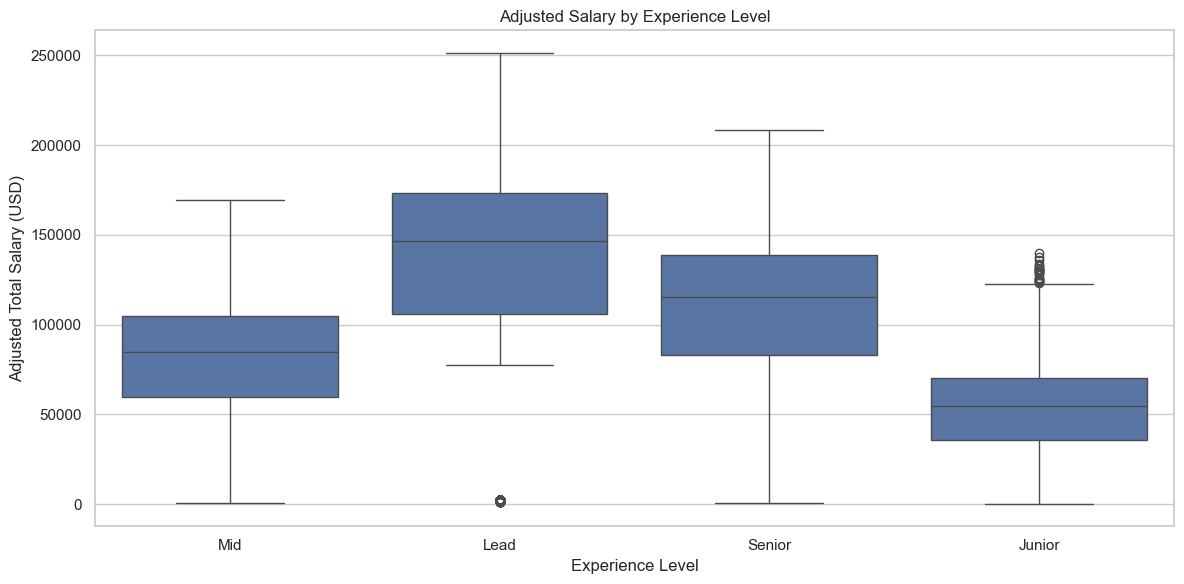

In [139]:
# 2. Boxplot - Salary by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='adjusted_total_usd', data=df)
plt.title("Adjusted Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Adjusted Total Salary (USD)")
plt.tight_layout()
plt.show()

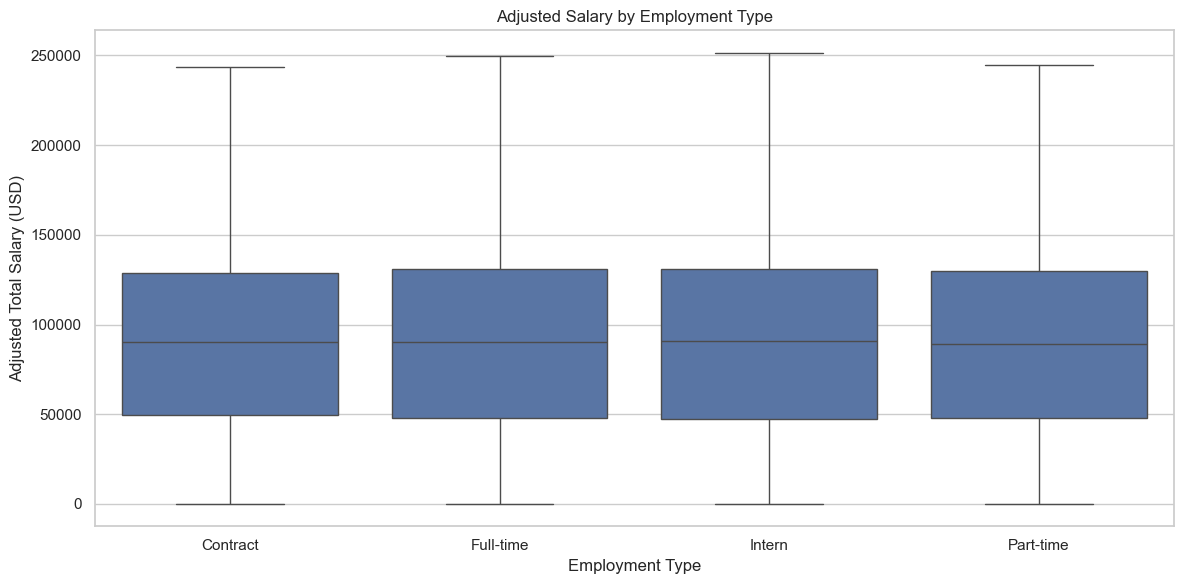

In [140]:
# 3. Boxplot - Salary by employment type
plt.figure(figsize=(12, 6))
sns.boxplot(x='employment_type', y='adjusted_total_usd', data=df)
plt.title("Adjusted Salary by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Adjusted Total Salary (USD)")
plt.tight_layout()
plt.show()


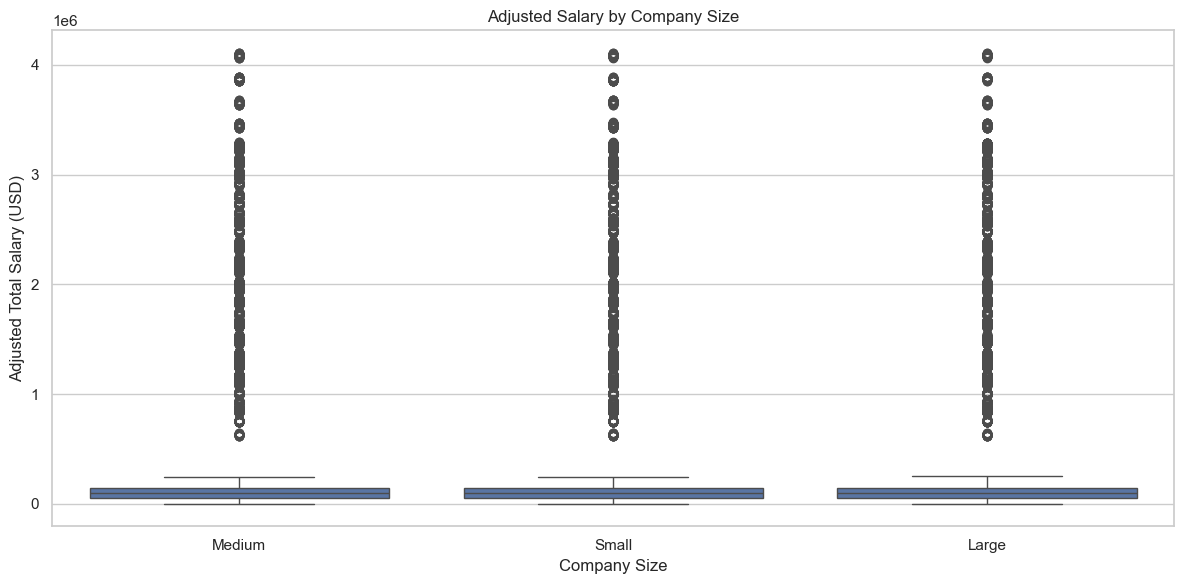

In [141]:
# 4. Boxplot - Salary by company size
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='adjusted_total_usd', data=df)
plt.title("Adjusted Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Adjusted Total Salary (USD)")
plt.tight_layout()
plt.show()


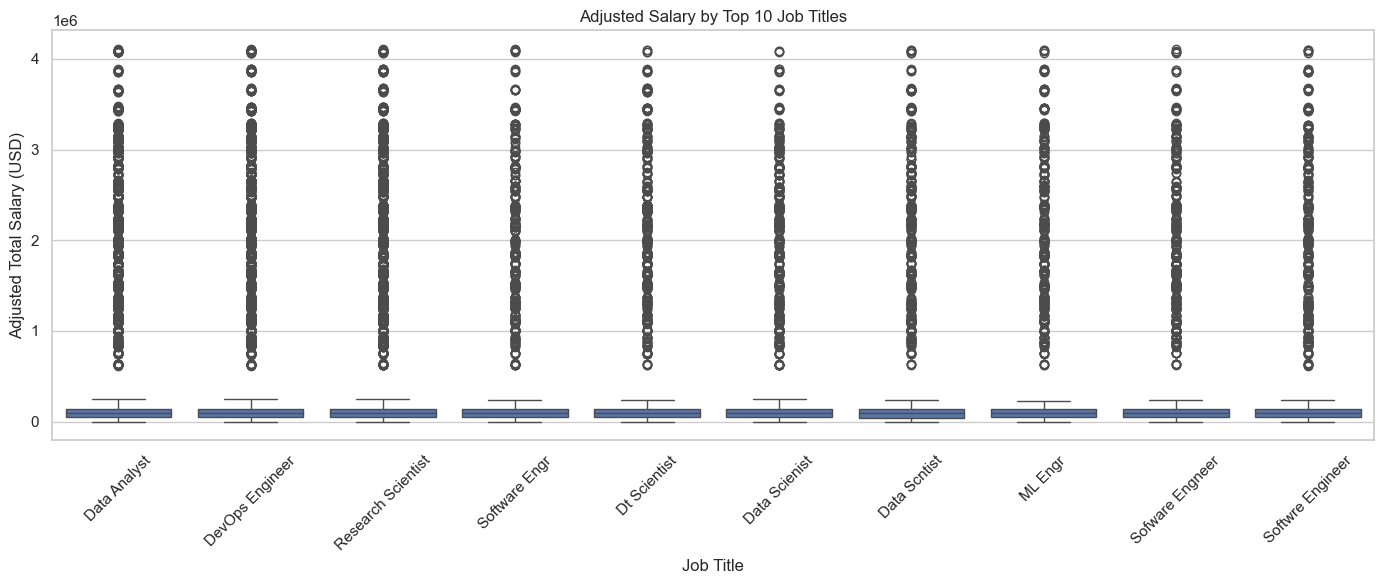

In [142]:
top_titles = df['job_title'].value_counts().nlargest(10).index
df_top_titles = df[df['job_title'].isin(top_titles)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='job_title', y='adjusted_total_usd', data=df_top_titles)
plt.title("Adjusted Salary by Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Adjusted Total Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

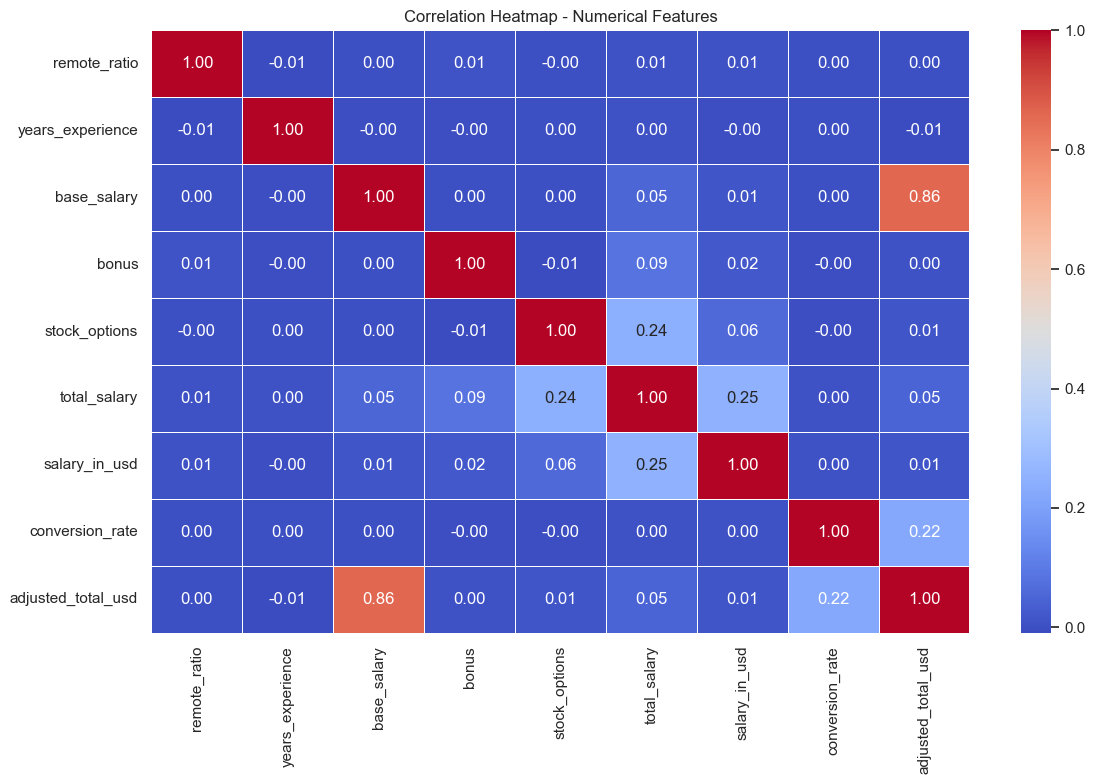

In [143]:
# Correlation Heatmap

numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Numerical Features")
plt.tight_layout()
plt.show()

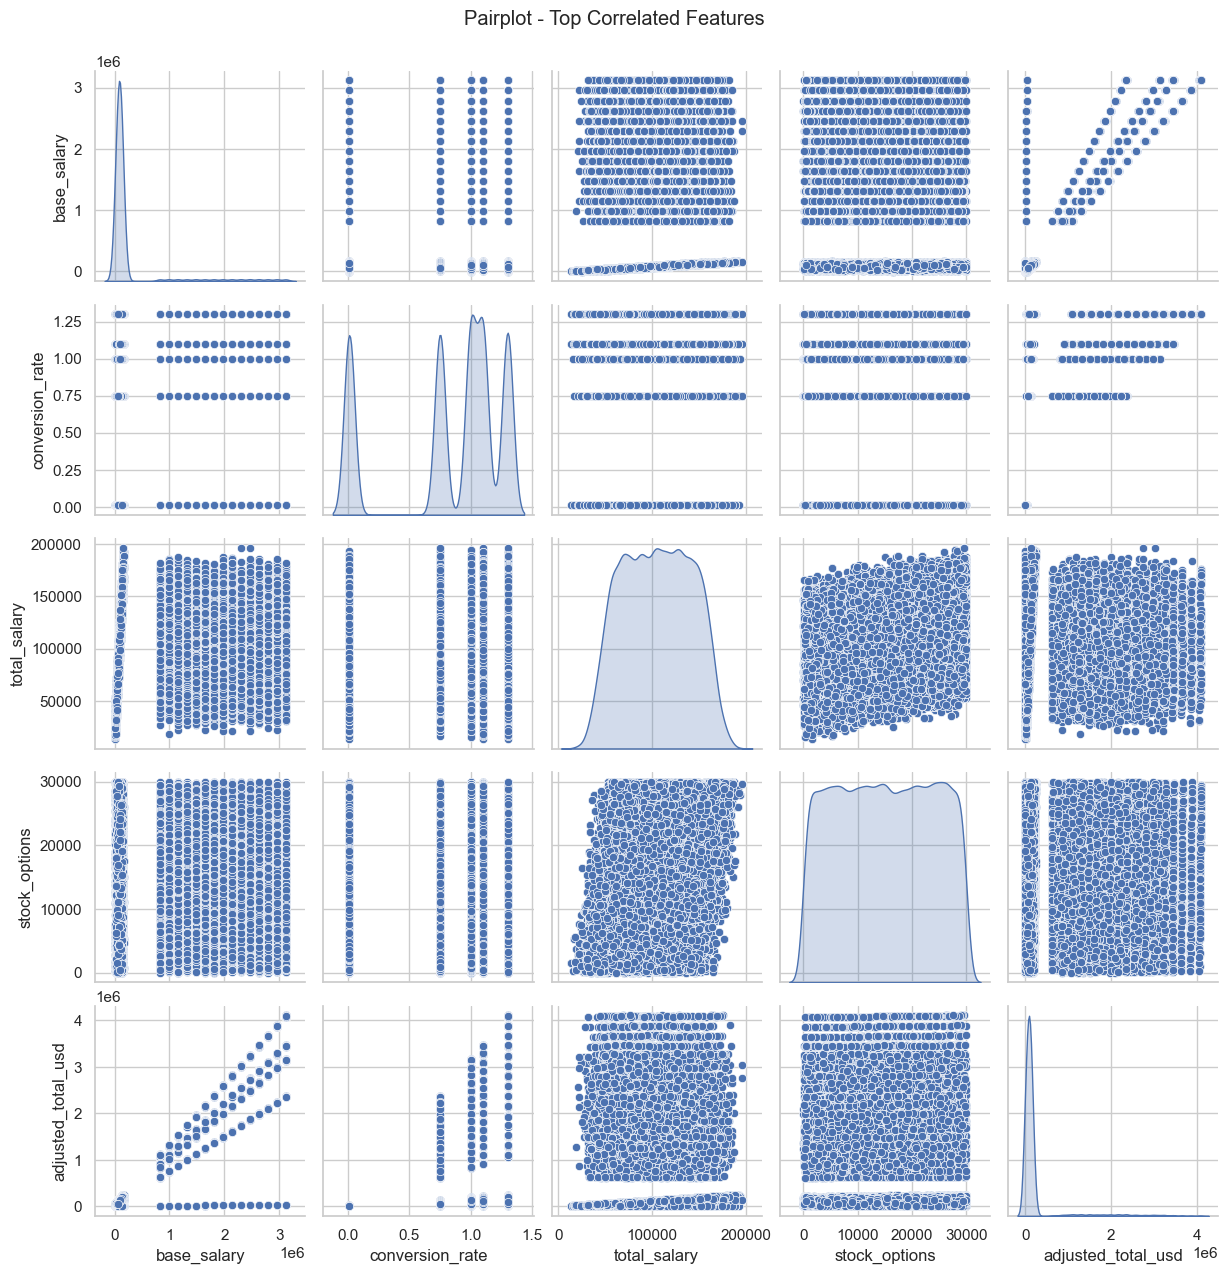

In [144]:
# 2. Pairplot of top correlated features with target

# Find top 4 features most correlated with 'adjusted_total_usd'
top_corr_features = corr['adjusted_total_usd'].abs().sort_values(ascending=False)[1:5].index.tolist()

# Add target to the list
features_to_plot = top_corr_features + ['adjusted_total_usd']

sns.pairplot(df[features_to_plot], diag_kind='kde')
plt.suptitle("Pairplot - Top Correlated Features", y=1.02)
plt.show()

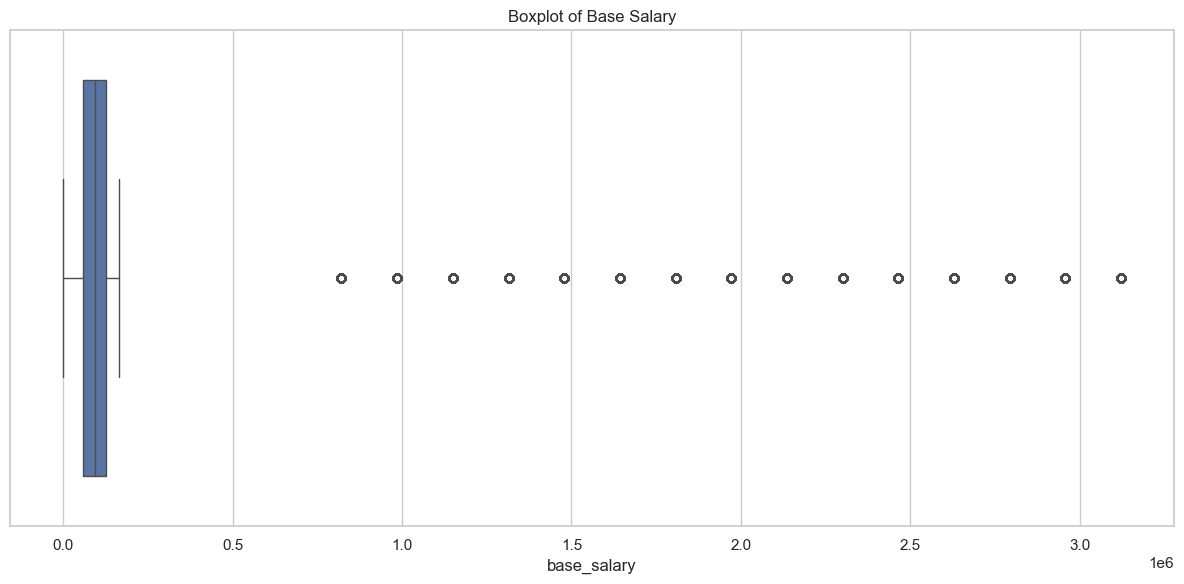

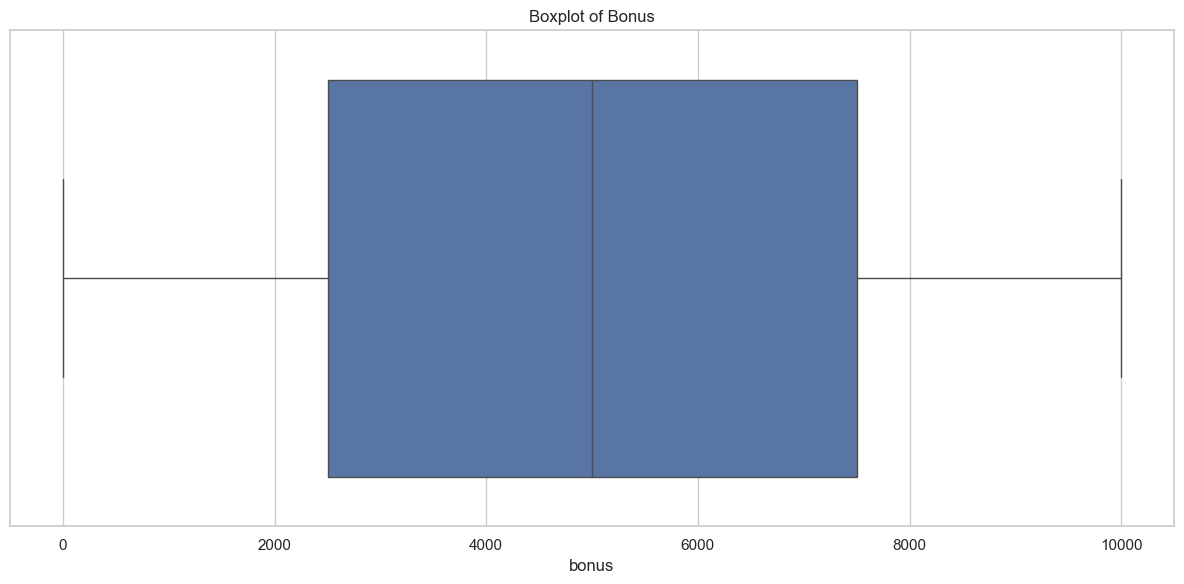

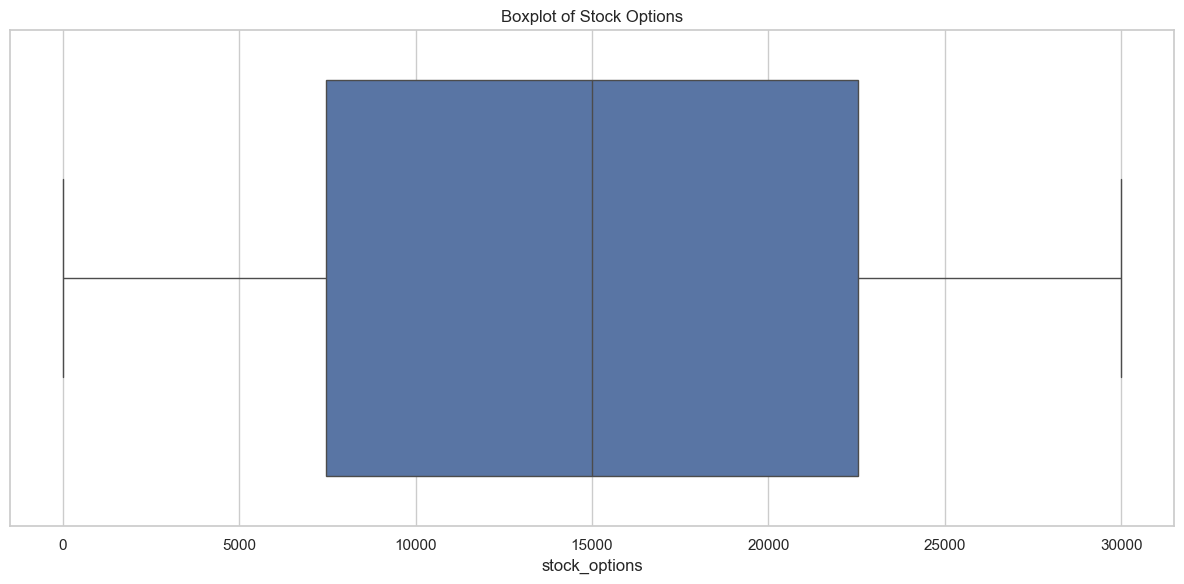

In [145]:
# 3. Outlier Detection with Boxplots

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['base_salary'])
plt.title("Boxplot of Base Salary")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['bonus'])
plt.title("Boxplot of Bonus")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['stock_options'])
plt.title("Boxplot of Stock Options")
plt.tight_layout()
plt.show()

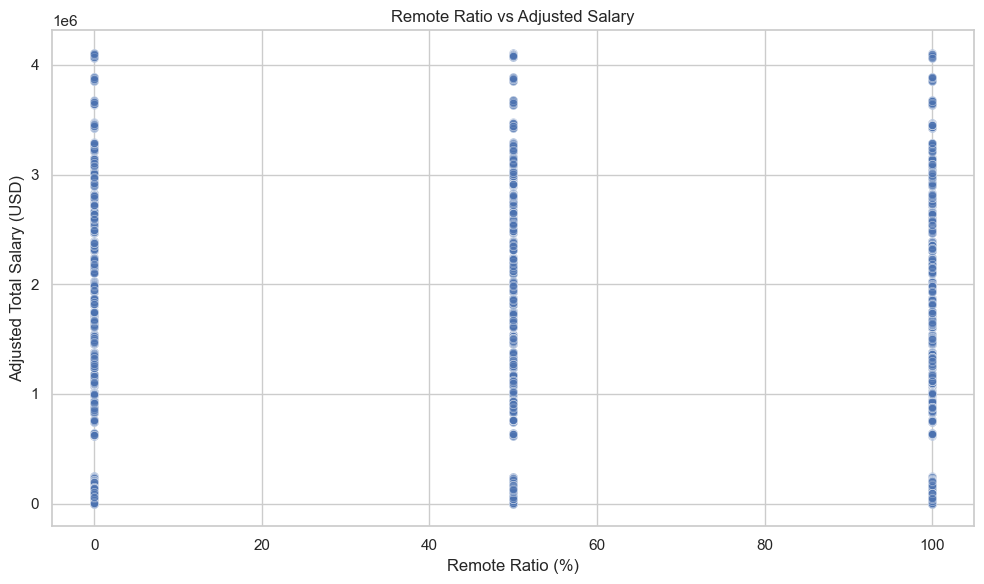

In [146]:
# 1. Remote Ratio vs Salary (Scatter)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='adjusted_total_usd', data=df, alpha=0.5)
plt.title("Remote Ratio vs Adjusted Salary")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Adjusted Total Salary (USD)")
plt.tight_layout()
plt.show()

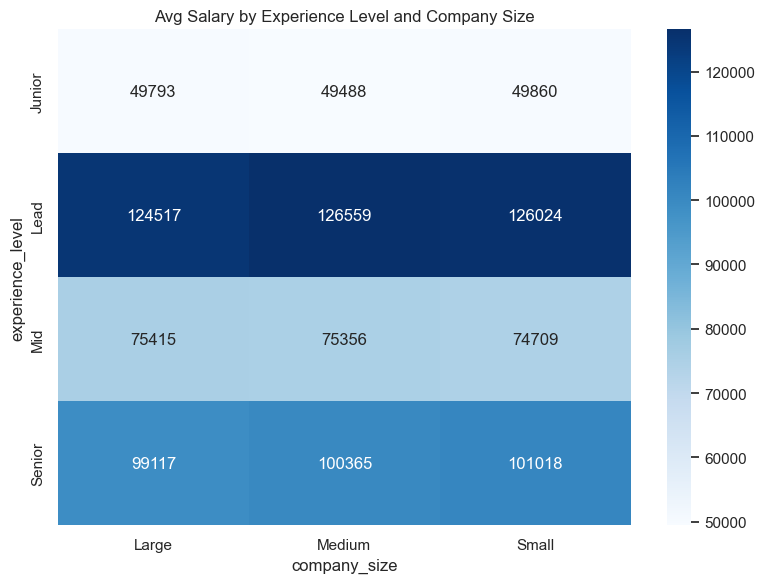

In [147]:
# 2. Average Salary by Experience Level and Company Size (Heatmap)

ivot_exp_size = df.pivot_table(values='adjusted_total_usd',
                                index='experience_level',
                                columns='company_size',
                                aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_exp_size, annot=True, fmt=".0f", cmap='Blues')
plt.title("Avg Salary by Experience Level and Company Size")
plt.tight_layout()
plt.show()

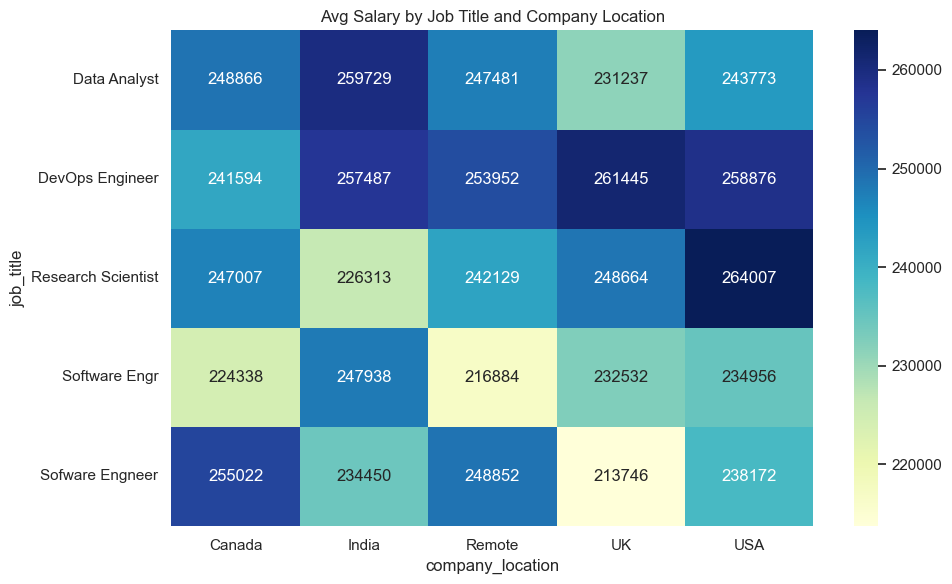

In [148]:
# 3. Average Salary by Job Title and Company Location (Heatmap)
top_jobs = df['job_title'].value_counts().nlargest(5).index
top_locations = df['company_location'].value_counts().nlargest(5).index
subset = df[df['job_title'].isin(top_jobs) & df['company_location'].isin(top_locations)]

pivot_title_loc = subset.pivot_table(values='adjusted_total_usd',
                                     index='job_title',
                                     columns='company_location',
                                     aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_title_loc, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Avg Salary by Job Title and Company Location")
plt.tight_layout()
plt.show()

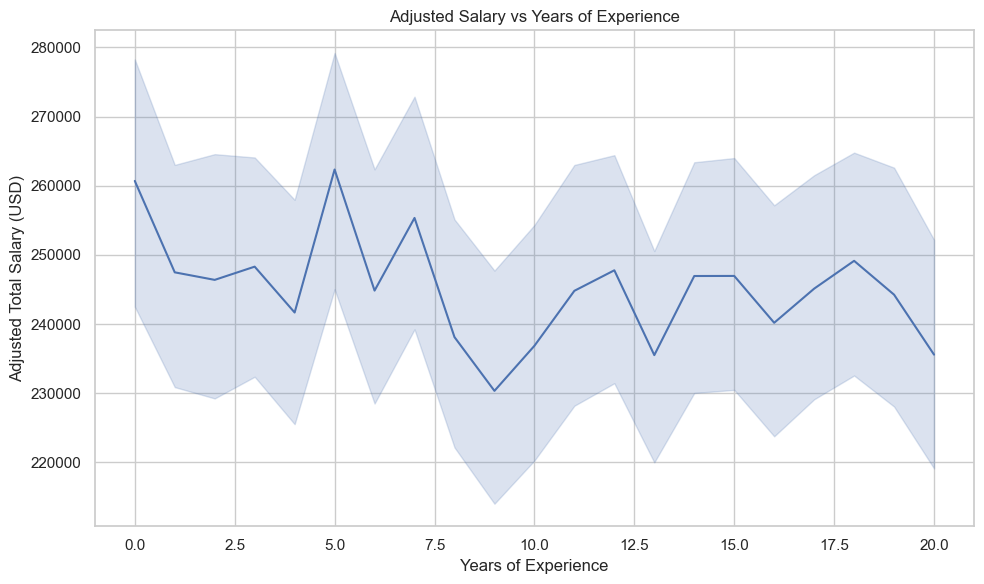

In [149]:
# 4. Experience Years vs Salary (Lineplot)
plt.figure(figsize=(10, 6))
sns.lineplot(x='years_experience', y='adjusted_total_usd', data=df)
plt.title("Adjusted Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Adjusted Total Salary (USD)")
plt.tight_layout()
plt.show()

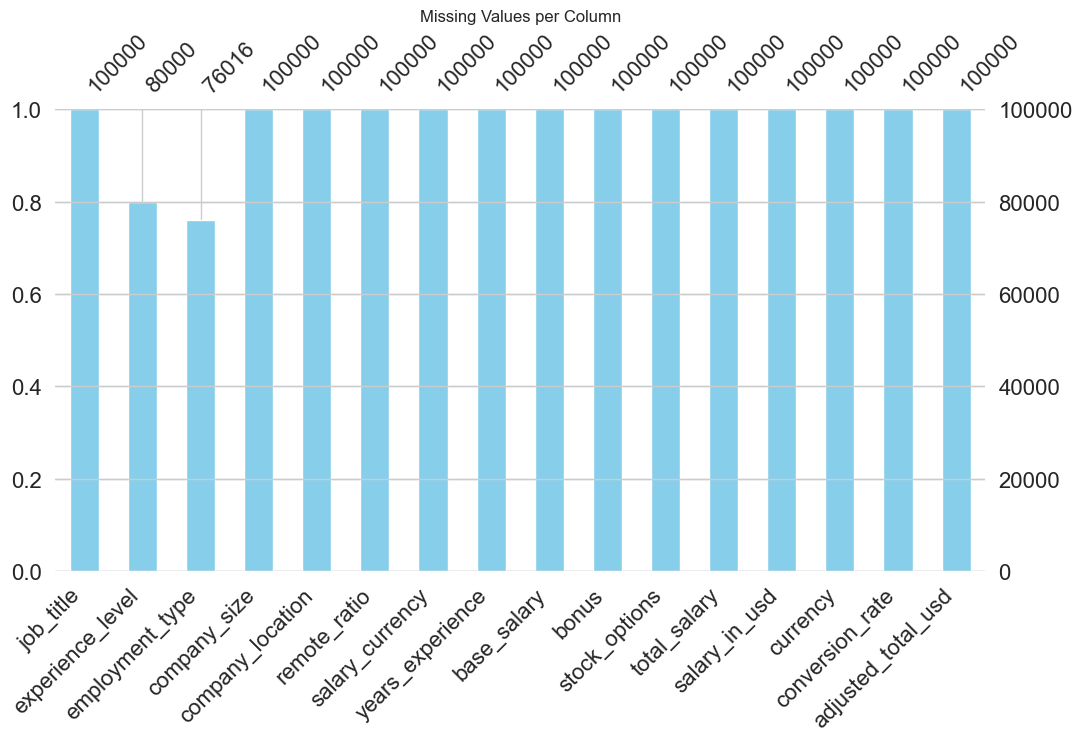

In [150]:
# 1. Bar chart of missing values
msno.bar(df, figsize=(12, 6), color='skyblue')
plt.title("Missing Values per Column")
plt.show()

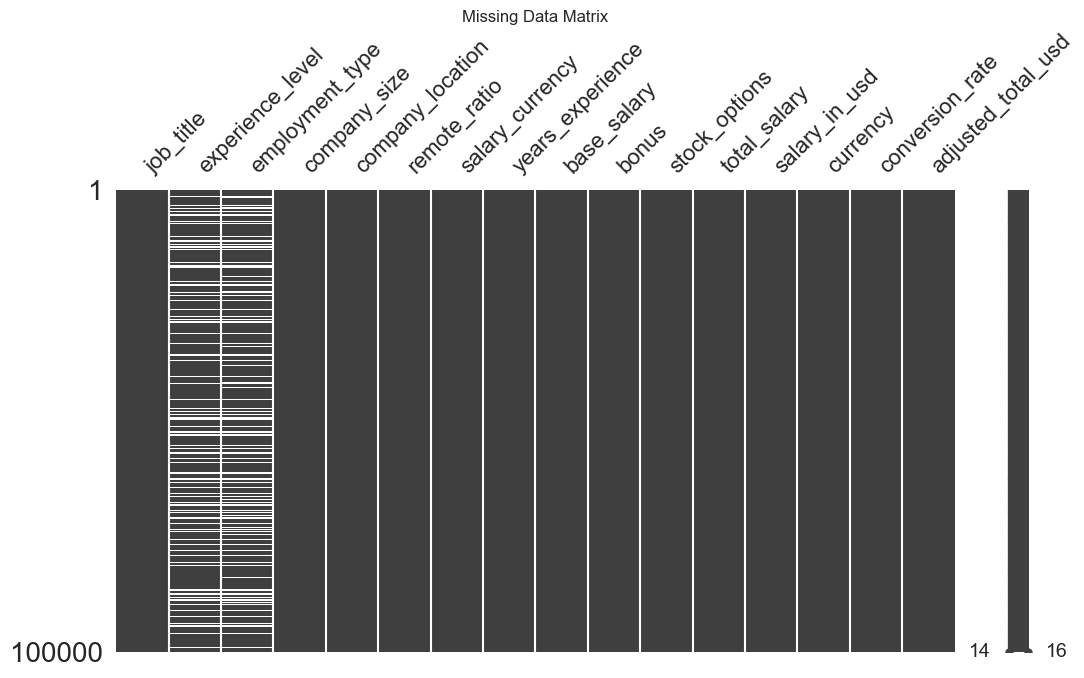

In [151]:
# 2. Matrix view of missing patterns
msno.matrix(df, figsize=(12, 6))
plt.title("Missing Data Matrix")
plt.show()

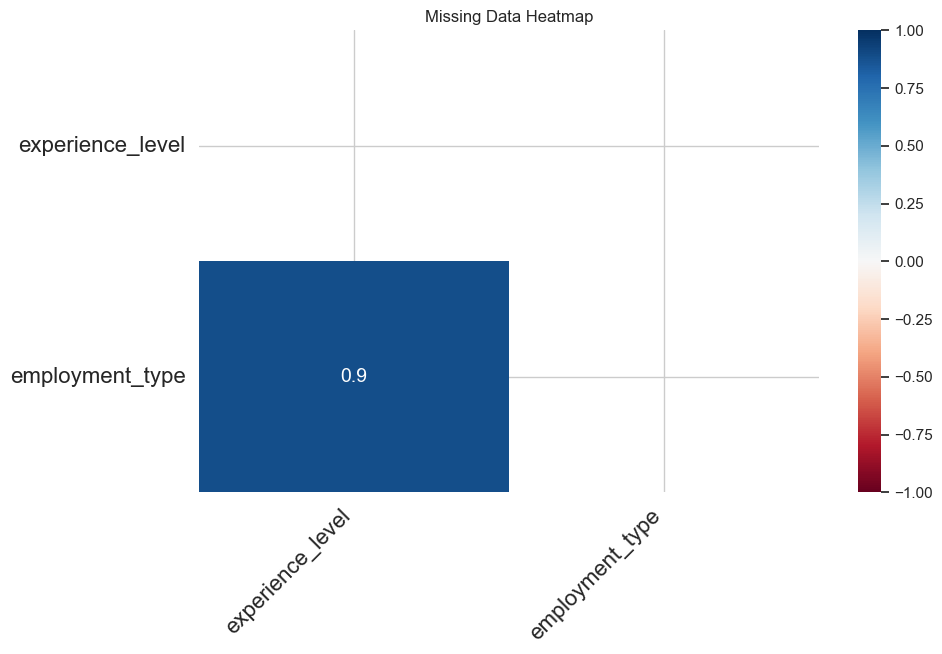

In [152]:
# 3. Heatmap to detect missing value correlations

msno.heatmap(df, figsize=(10, 6))
plt.title("Missing Data Heatmap")
plt.show()


In [153]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Print range info for each numeric feature
print("Range of All Numerical Features:\n")
for col in numeric_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"{col}: Min = {round(col_min, 2)} | Max = {round(col_max, 2)} | Range = {round(col_max - col_min, 2)}")


Range of All Numerical Features:

remote_ratio: Min = 0 | Max = 100 | Range = 100
years_experience: Min = 0 | Max = 20 | Range = 20
base_salary: Min = -344.34 | Max = 3121412.46 | Range = 3121756.8
bonus: Min = 0 | Max = 9999 | Range = 9999
stock_options: Min = 0 | Max = 29998 | Range = 29998
total_salary: Min = 13732.47 | Max = 196335.84 | Range = 182603.37
salary_in_usd: Min = 221.01 | Max = 2354698.24 | Range = 2354477.23
conversion_rate: Min = 0.01 | Max = 1.3 | Range = 1.29
adjusted_total_usd: Min = 164.79 | Max = 4108339.9 | Range = 4108175.11


In [154]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Calculate outliers for each column using IQR
print("Outlier Counts for Numeric Features:\n")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")


Outlier Counts for Numeric Features:

remote_ratio: 0 outliers
years_experience: 0 outliers
base_salary: 10000 outliers
bonus: 0 outliers
stock_options: 0 outliers
total_salary: 0 outliers
salary_in_usd: 1580 outliers
conversion_rate: 19934 outliers
adjusted_total_usd: 8004 outliers


In [155]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute and print skewness
print("📊 Skewness of Numerical Features:\n")
skewness = numeric_cols.skew().sort_values(ascending=False)
print(skewness.round(2))


📊 Skewness of Numerical Features:

salary_in_usd         7.40
adjusted_total_usd    3.91
base_salary           3.26
remote_ratio          0.00
bonus                -0.00
stock_options        -0.01
total_salary         -0.01
years_experience     -0.01
conversion_rate      -0.96
dtype: float64
